#### Problem Statement 1 

#### Consider only the below columns and prepare a prediction model for predicting Price.

#### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car

Price  -- Offer Price in EUROs	

Age_08_04 -- Age in months as in August 2004	

Mfg_Month -- Manufacturing month (1-12)	

Mfg_Year	-- Manufacturing Year

KM -- Accumulated Kilometers on odometer

Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)

HP -- Horse Power

Met_Color	 -- Metallic Color?  (Yes=1, No=0)

Color -- Color (Blue, Red, Grey, Silver, Black, etc.)

Automatic	-- Automatic ( (Yes=1, No=0)

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Cylinders	-- Number of cylinders

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms

Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)

BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)

Guarantee_Period -- 	Guarantee period in months

ABS -- Anti-Lock Brake System (Yes=1, No=0)

Airbag_1 -- Driver_Airbag  (Yes=1, No=0)

Airbag_2 -- Passenger Airbag  (Yes=1, No=0)

Airco -- Airconditioning  (Yes=1, No=0)

Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)

Boardcomputer -- Boardcomputer  (Yes=1, No=0)

CD_Player -- CD Player  (Yes=1, No=0)

Central_Lock -- Central Lock  (Yes=1, No=0)

Powered_Windows -- Powered Windows  (Yes=1, No=0)

Power_Steering -- Power Steering  (Yes=1, No=0)

Radio -- Radio  (Yes=1, No=0)

Mistlamps	-- Mistlamps  (Yes=1, No=0)

Sport_Model -- Sport Model  (Yes=1, No=0)

Backseat_Divider -- Backseat Divider  (Yes=1, No=0)

Metallic_Rim --Metallic Rim  (Yes=1, No=0)

Radio_cassette -- Radio Cassette  (Yes=1, No=0)

Tow_Bar -- Tow Bar  (Yes=1, No=0)

In [135]:
# Importing Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [136]:
# Importing the dataset
cars=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


#### Performing EDA Analysis 

In [137]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [138]:
cars=pd.concat([cars.iloc[:,2:4],cars.iloc[:,6:7],cars.iloc[:,8:9],cars.iloc[:,12:14],cars.iloc[:,15:18]],axis=1)
cars

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


As, it is a multiple linear regression model. We only deal with numericals.
Hence, only selecting columns of numerical values.

pd.concat: This is a function from the Pandas library that concatenates two or more dataframes together.

cars.iloc[:,2:4]: This is selecting all rows of cars and columns 2 to 4 (exclusive) of the DataFrame.(Price, Age_08_04,	KM)

cars.iloc[:,6:7]: This is selecting all rows of cars and column 6 of the DataFrame.(HP)

cars.iloc[:,8:9]: This is selecting all rows of cars and column 8 of the DataFrame.(cc)

cars.iloc[:,12:14]: This is selecting all rows of cars and columns 12 to 14 (exclusive) of the DataFrame.(Doors, Gears)

cars.iloc[:,15:18]: This is selecting all rows of cars and columns 15 to 18 (exclusive) of the DataFrame.(Quarterly_Tax, Weight)

axis=1: This is specifying that the concatenation should be performed horizontally, i.e. the columns should be concatenated together.

Overall, the code is selecting specific columns from cars and concatenating them together horizontally to create a new DataFrame. The resulting DataFrame will have columns in the following order: columns 2 to 4, column 6, column 8, columns 12 to 14 (exclusive), and columns 15 to 18 (exclusive).

In [139]:
cars[cars.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


The code "cars[cars.duplicated()]" is used to identify and display the rows in the "cars" dataset that are duplicates based on all columns.

Here's what each part of the code means:

"cars": This is the name of the dataset that we are working with.

".duplicated()": This is a method that checks each row in the dataset for duplicates. If a row is identical to a previous row, it is marked as a duplicate.

"cars[ ]": This is used to select the rows in the "cars" dataset that meet a certain condition, which in this case is duplicates.

"cars[duplicated()]": This selects all rows in "cars" that are duplicates based on all columns.

Therefore, the code "cars[cars.duplicated()]" will return a subset of the original "cars" dataset that only contains the rows that are duplicates based on all columns.

Here, we can see that the row number of 113 is a duplicate and hence it needs to be dropped.


In [140]:
cars=cars.rename({'Age_08_04':'Age_of_the_Car','cc':'Cubic_Capacity'},axis=1)
cars

,Price,Age_of_the_Car,KM,HP,Cubic_Capacity,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [141]:
cars=cars.drop_duplicates().reset_index(drop=True)
cars

,Price,Age_of_the_Car,KM,HP,Cubic_Capacity,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


Assuming that "cars" is a Pandas DataFrame containing information about cars, the code cars.drop_duplicates().reset_index(drop=True) performs the following:

drop_duplicates(): This method drops all the duplicate rows from the DataFrame "cars".

reset_index(drop=True): This method resets the index of the DataFrame after dropping the duplicate rows. The parameter drop=True ensures that the old index is not added as a new column in the DataFrame.
So, the code basically removes all the duplicate rows from the "cars" DataFrame and resets the index of the DataFrame. The new DataFrame with no duplicate rows is returned as the output.

In [71]:
cars.describe()

,KM,HP,Gears,Weight
count,1410.000000,1410.000000,1410.000000,1410.000000
mean,68857.097163,101.472340,5.026950,1072.682270
std,37614.045301,15.057576,0.190207,52.470233
min,1.000000,69.000000,3.000000,1000.000000
25%,43000.000000,87.000000,5.000000,1040.000000
50%,63713.500000,110.000000,5.000000,1070.000000
75%,87720.750000,110.000000,5.000000,1085.000000
max,243000.000000,192.000000,6.000000,1615.000000


In [142]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Price           1435 non-null   int64
 1   Age_of_the_Car  1435 non-null   int64
 2   KM              1435 non-null   int64
 3   HP              1435 non-null   int64
 4   Cubic_Capacity  1435 non-null   int64
 5   Doors           1435 non-null   int64
 6   Gears           1435 non-null   int64
 7   Quarterly_Tax   1435 non-null   int64
 8   Weight          1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


As, we can see that one row which is duplicate has been dropped. Now, the total rows is 1435 instead of 1436.

#### Correlation Analysis 

In [143]:
cars.corr()

,Price,Age_of_the_Car,KM,HP,Cubic_Capacity,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_of_the_Car,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
Cubic_Capacity,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


Some observations that can be made from the output of cars.corr() are:

The correlation coefficient between a variable and itself is always 1.

If the correlation coefficient between two variables is close to 1, it indicates a strong positive linear relationship between the two variables.

If the correlation coefficient between two variables is close to -1, it indicates a strong negative linear relationship between the two variables.

If the correlation coefficient between two variables is close to 0, it indicates that there is no linear relationship between the two variables.

From the above table, we can see that there is a mix of both negative and positive correlations.

<Figure size 1000x800 with 0 Axes>

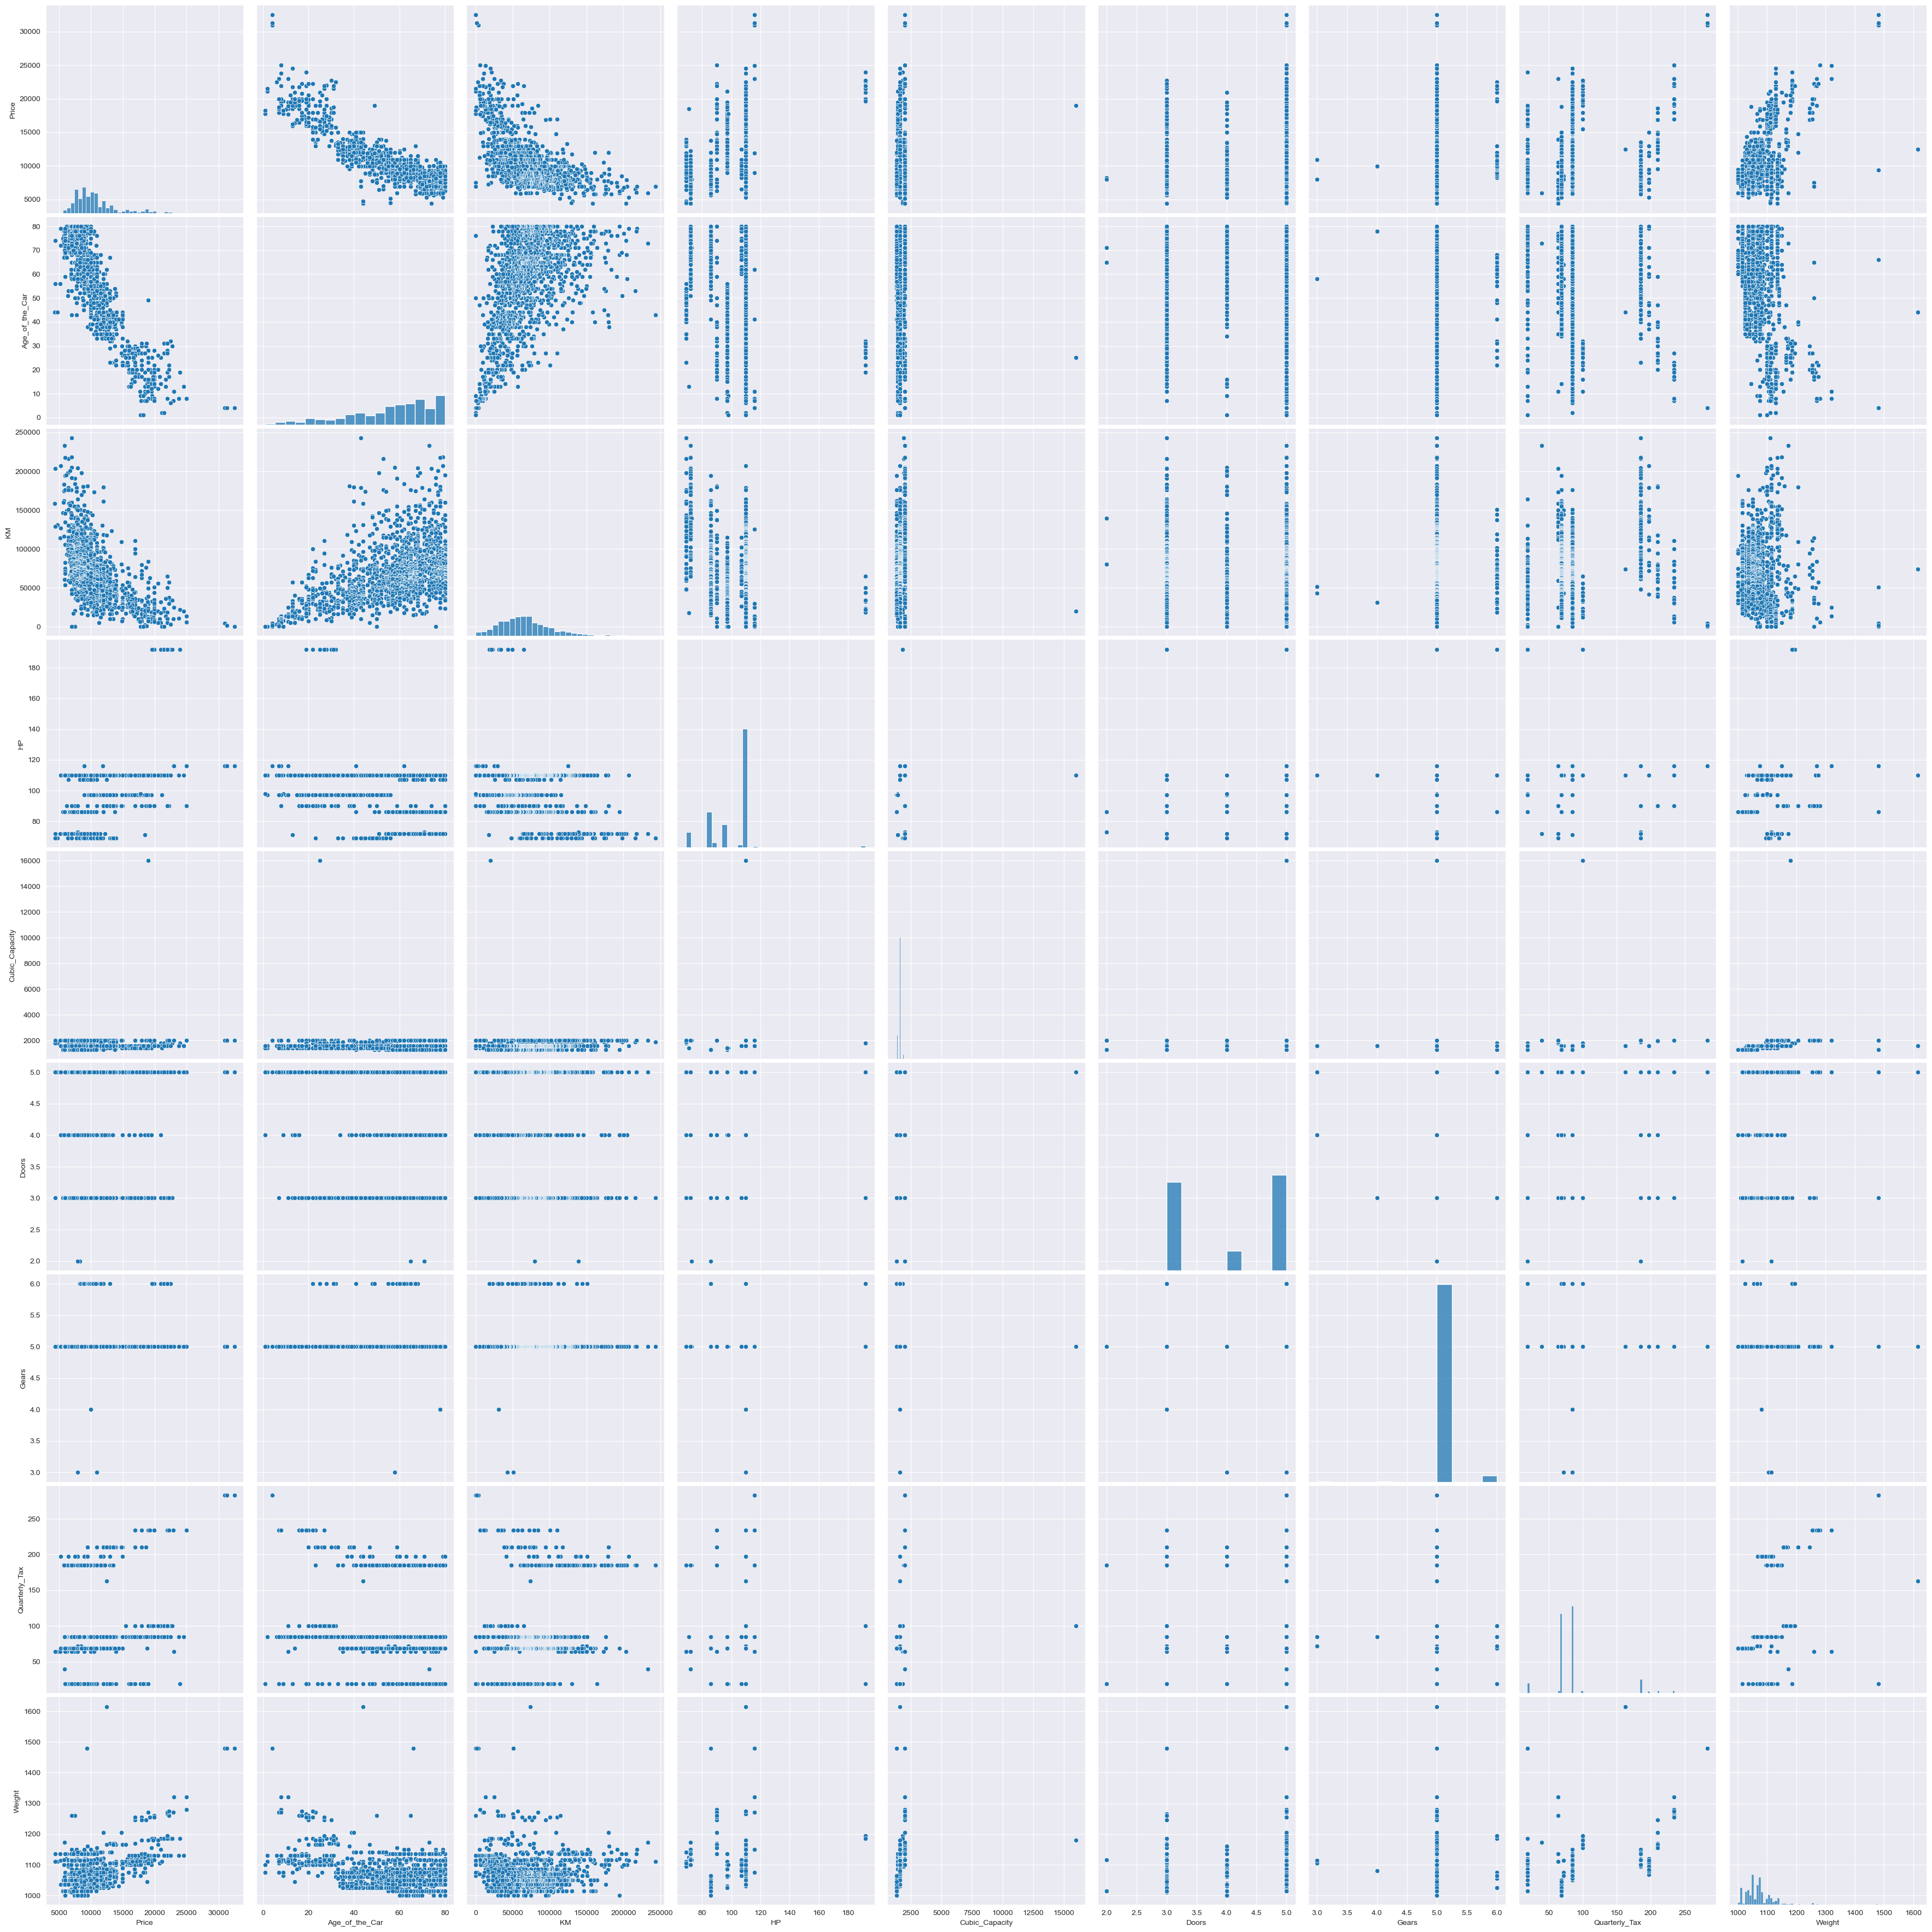

In [167]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,8))
sns.pairplot(cars, height=4)

The sns.set_style(style='darkgrid') line sets the style of the Seaborn plots to "darkgrid", which is a style that adds a dark background and gridlines to the plots.

The sns.pairplot(cars, height =2) line creates a pair plot of the "cars" dataset, which is a type of plot that shows pairwise relationships between variables in a dataset. The height parameter increases the height of each subplot. It can be used to quickly identify patterns and correlations between the variables.

In this example, I've also used plt.figure(figsize=(3,3)) to set the overall size of the figure to 3 inches by 3 inches. You can adjust the size to your desired dimensions.



#### Building the Model

In [168]:
model=smf.ols('Price~Age_of_the_Car+KM+HP+Cubic_Capacity+Doors+Gears+Quarterly_Tax+Weight',data=cars).fit()

It looks like you are trying to fit a linear regression model using the smf (statsmodels.formula.api) package in Python.

The model you specified assumes that the variable Price is linearly related to the variables Age_of_the_Car, KM, HP, Cubic_Capacity, Doors, Gears, Quarterly_Tax, and Weight. The data argument specifies the dataset cars that you are using to fit the model.

The target variable(dependent variable) is the variable Price.
The independent variables are Age_of_the_Car, KM, HP, Cubic_Capacity, Doors, Gears, Quarterly_Tax and Weight. All these variables are used to predict the target variable Price.

The resulting fitted model is stored in the model object. You can use this object to obtain various information about the model, such as the fitted coefficients, the R-squared value, and so on.

#### Testing the Model  

In [169]:
# Finding Coefficient parameters
model.params

Intercept        -5472.540368
Age_of_the_Car    -121.713891
KM                  -0.020737
HP                  31.584612
Cubic_Capacity      -0.118558
Doors               -0.920189
Gears              597.715894
Quarterly_Tax        3.858805
Weight              16.855470
dtype: float64

The command model.params gives us the following values:

Intercept: the intercept or bias term of the linear regression model

Age_of_the_Car: the coefficient for the predictor variable "Age_of_the_Car"

KM: the coefficient for the predictor variable "KM"

HP: the coefficient for the predictor variable "HP"

Cubic_Capacity: the coefficient for the predictor variable "Cubic_Capacity"

Doors: the coefficient for the predictor variable "Doors"

Gears: the coefficient for the predictor variable "Gears"

Quarterly_Tax: the coefficient for the predictor variable "Quarterly_Tax"

Weight: the coefficient for the predictor variable "Weight"

These coefficients represent the effect of each predictor variable on the target variable in the linear regression model. The values of the coefficients tell you how much the target variable changes for a unit increase in each predictor variable, holding all other predictor variables constant.

In [170]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,3)

(Intercept         -3.875273
 Age_of_the_Car   -46.551876
 KM               -16.552424
 HP                11.209719
 Cubic_Capacity    -1.316436
 Doors             -0.023012
 Gears              3.034563
 Quarterly_Tax      2.944198
 Weight            15.760663
 dtype: float64,
 Intercept         0.000
 Age_of_the_Car    0.000
 KM                0.000
 HP                0.000
 Cubic_Capacity    0.188
 Doors             0.982
 Gears             0.002
 Quarterly_Tax     0.003
 Weight            0.000
 dtype: float64)

After performing the above command, we get values of t-statisic and p-values of all the coefficients involved.

The t-values are measures of the magnitude of the difference between the estimated coefficient for each predictor variable and zero, relative to the standard error of the coefficient estimate. Essentially, the higher the absolute value of the t-value, the more "important" that predictor variable is in predicting the outcome variable.

The p-values represent the probability of observing a t-value as extreme as the one obtained if the null hypothesis were true, which in this case is the hypothesis that the coefficient for the corresponding predictor variable is zero. Generally, a p-value less than 0.05 is considered statistically significant, indicating that there is strong evidence against the null hypothesis and that the corresponding predictor variable is likely to be important in predicting the outcome variable.

Looking at the provided output, we can see that all predictor variables except for "Cubic_Capacity" and "Doors" have t-values with absolute values greater than 1.96, which corresponds to a p-value less than 0.05 assuming a two-tailed test. This suggests that those predictor variables are statistically significant in predicting the outcome variable. The "Cubic_Capacity" predictor variable has a p-value of 0.18824, which is greater than 0.05, suggesting that it is not statistically significant in predicting the outcome variable. The "Doors" predictor variable has a p-value of 0.98164, which is much greater than 0.05, providing strong evidence in support of the null hypothesis that the coefficient for this variable is zero and it is not important in predicting the outcome variable.

In [171]:
# Finding rsquared values
model.rsquared , model.rsquared_adj  

(0.8625200256947001, 0.8617487495415147)

The rsquared and rsquared_adj are statistical measures of how well the regression model fits the data. rsquared represents the proportion of variation in the dependent variable that is explained by the independent variables in the model. rsquared_adj is similar to rsquared, but it takes into account the number of independent variables in the model and adjusts the rsquared value accordingly.

In the code you provided, model.rsquared and model.rsquared_adj are already calculated and their values are 0.8625200256947001 and 0.8617487495415147, respectively.

Typically, an rsquared value of 0.7 or higher is considered a strong fit for a regression model, so an rsquared value of 0.8625 indicates a good fit. The rsquared_adj value is slightly lower than rsquared because there are independent variables in the model, but it is still a strong fit.

In [172]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:31:10   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age_of_the_Car  -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM                -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP                31.5846      2.818     11.210      0.000      26.058      37.112
Cubic_Capacity    -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors             -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears            597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax      3.8588      1.311      2.944      0.003       1.288       6.430
Weight            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above line provides a summary of calculations ans observations related to the model, we just created.

We choose Cubic_Capacity and Doors as insigniifcant as they have repetitive values or they contain the same values. They can affect the model.

In [173]:
#Creating a Simple Linear Regression Model for  'Cubic_Capacity' 
slr_cc=smf.ols('Price~Cubic_Capacity',data=cars).fit()
#Finding their t-values and p-values accordingly
slr_cc.tvalues , slr_cc.pvalues

(Intercept         24.879592
 Cubic_Capacity     4.745039
 dtype: float64,
 Intercept         7.236022e-114
 Cubic_Capacity     2.292856e-06
 dtype: float64)



SLR(Simple Linear Regression) examines the relationship between the dependent variable and a single independent variable.

MLR(Multiple Linear Regression) examines the relationship between the dependent variable and multiple independent variables.

The output provided shows the t-values and p-values for the model's intercept and slope coefficients. The intercept coefficient's t-value is 24.879592, which means that it is statistically significant, and the corresponding p-value is very low (7.236022e-114), indicating strong evidence against the null hypothesis that the intercept is zero.

Similarly, the slope coefficient for the 'Cubic_Capacity' variable has a t-value of 4.745039, which is also statistically significant, and the corresponding p-value is 2.292856e-06. This indicates strong evidence against the null hypothesis that the slope coefficient is zero, suggesting that there is a significant linear relationship between the 'Cubic_Capacity' and 'Price' variables.

In [174]:
#Creating a Simple Linear Regression Model for  'Doors' 
slr_doors=smf.ols('Price~Doors',data=cars).fit()
#Finding their t-values and p-values accordingly
slr_doors.tvalues , slr_doors.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

The code shows the creation of  simple linear regression model to predict the car price based on the number of doors, and then finding the t-values and p-values for the model.

The t-values measure the number of standard errors that the estimated coefficients are away from zero. In this case, the t-value for the intercept is 19.421546 and the t-value for the number of doors is 7.070520.

The p-values measure the probability of obtaining a t-value as extreme or more extreme than the observed t-value, assuming that the null hypothesis (that the coefficient is zero) is true. In this case, the p-value for the intercept is 8.976407e-75 (very close to zero) and the p-value for the number of doors is 2.404166e-12 (also very close to zero). This suggests that both the intercept and the number of doors are significant predictors of the car price.

In [175]:
mlr_combined=smf.ols('Price~Cubic_Capacity+Doors',data=cars).fit()
mlr_combined.tvalues , mlr_combined.pvalues 

(Intercept         12.786341
 Cubic_Capacity     4.268006
 Doors              6.752236
 dtype: float64,
 Intercept         1.580945e-35
 Cubic_Capacity    2.101878e-05
 Doors             2.109558e-11
 dtype: float64)

The code performs a multiple linear regression (MLR) on a dataset of cars using two independent variables, "Cubic_Capacity" and "Doors", to predict the dependent variable "Price".

The smf.ols() function from the statsmodels package is used to fit the linear regression model, and the .fit() method is called to actually fit the model to the data.

The tvalues attribute of the mlr_combined object contains the t-statistic for each coefficient estimate in the regression model. The t-statistic measures the number of standard errors the coefficient estimate is from zero.

The pvalues attribute of the mlr_combined object contains the p-value for each coefficient estimate in the regression model. The p-value measures the probability of observing a t-statistic as extreme or more extreme than the one observed, assuming the null hypothesis that the coefficient is zero.

In this case, the intercept has a very high t-value and a very small p-value, indicating that it is a significant predictor of the dependent variable. Both "Cubic_Capacity" and "Doors" also have significant t-values and small p-values, indicating that they are also significant predictors of the dependent variable.

#### Validating the Model

#### Checking the Collinearity 

In [176]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age_of_the_Car~KM+HP+Cubic_Capacity+Doors+Gears+Quarterly_Tax+Weight',data=cars).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age_of_the_Car+HP+Cubic_Capacity+Doors+Gears+Quarterly_Tax+Weight',data=cars).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age_of_the_Car+KM+Cubic_Capacity+Doors+Gears+Quarterly_Tax+Weight',data=cars).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('Cubic_Capacity~Age_of_the_Car+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=cars).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age_of_the_Car+KM+HP+Cubic_Capacity+Gears+Quarterly_Tax+Weight',data=cars).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age_of_the_Car+KM+HP+Cubic_Capacity+Doors+Quarterly_Tax+Weight',data=cars).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('Quarterly_Tax~Age_of_the_Car+KM+HP+Cubic_Capacity+Doors+Gears+Weight',data=cars).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age_of_the_Car+KM+HP+Cubic_Capacity+Doors+Gears+Quarterly_Tax',data=cars).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d={'Variables':['Age_of_the_Car','KM','HP','Cubic_Capacity','Doors','Gears','Quarterly_Tax','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d)
Vif_df

,Variables,Vif
0,Age_of_the_Car,1.876236
1,KM,1.757178
2,HP,1.419180
3,Cubic_Capacity,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


The code provided checks for the collinearity problem in the independent variables of a linear regression model by calculating the VIF (Variance Inflation Factor) for each independent variable.

VIF measures how much the variance of an estimated regression coefficient is increased due to collinearity among the independent variables. A VIF value of 1 indicates no collinearity, whereas a VIF value greater than 1 suggests collinearity.

The code fits separate linear regression models for each independent variable against all other independent variables, calculates the R-squared value for each model, and then uses the R-squared value to compute the VIF value for each independent variable.

The resulting VIF values are stored in a pandas DataFrame object named "Vif_df", which has two columns: "Variables" (independent variable names) and "Vif" (corresponding VIF values).

Based on the VIF values, we can see that there is no severe collinearity problem in this dataset. All VIF values are less than 5, which is a common threshold for identifying collinearity issues. However, the variable "Weight" has the highest VIF value of 2.487180, indicating some moderate collinearity with other independent variables. It is advisable to investigate this variable further to ensure that it is not causing any problems in the model.

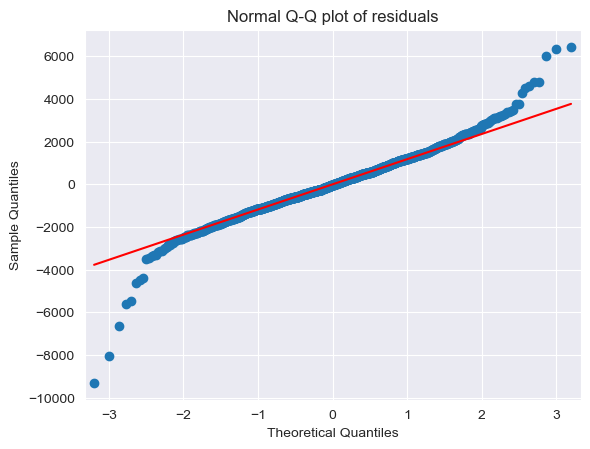

In [177]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

As, we can see from the above Q-Q plot , there do exist some outliers in the above plot.

In [178]:
#Checking the datapoints(name of the rows) of the outlier on the first part of graph
list(np.where(model.resid>6000))  # outlier detection from above QQ plot of residuals

[array([109, 146, 522])]

In [179]:
#Checking the datapoints(name of the rows) of the outlier on the second part of graph
list(np.where(model.resid<-6000))  # outlier detection from above QQ plot of residuals

[array([220, 600, 959])]

In [180]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
#Defining a function to get the standardized values
#User defined z = (x - mu)/sigma
def standard_values(vals) : 
    return (vals-vals.mean())/vals.std() 

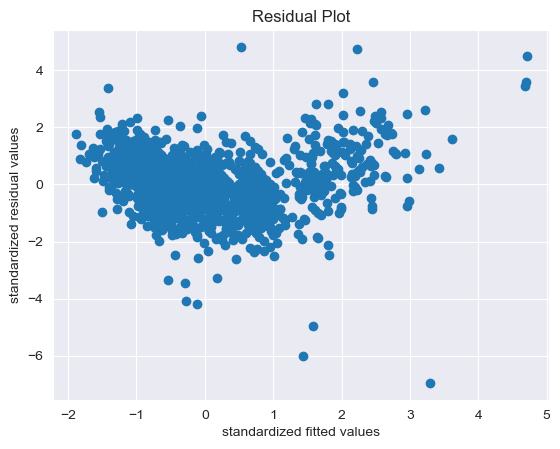

In [181]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

This function takes a numpy array vals and returns its standardized values using the formula z = (x - mu)/sigma, where mu is the mean of vals and sigma is its standard deviation. The resulting standardized values have a mean of 0 and a standard deviation of 1.

Example of function to plot the standardized fitted values against the standardized residuals to test for homoscedasticity or heteroscedasticity in a linear regression model:

import matplotlib.pyplot as plt
import numpy as np

#Fit the linear regression model and calculate standardized residuals and fitted values

model = ...  # Your linear regression model

y_pred = model.predict(X)  # Predicted values of y

residuals = y - y_pred  # Residuals

residuals_std = standard_values(residuals)  # Standardized residuals

y_pred_std = standard_values(y_pred)  # Standardized fitted values

#Plot the standardized residuals against the standardized fitted values

plt.scatter(y_pred_std, residuals_std)

plt.xlabel("Standardized fitted values")

plt.ylabel("Standardized residuals")

plt.title("Residual plot")

plt.show()

If the scatter plot shows a random pattern with no clear trend, then the assumption of homoscedasticity is met. On the other hand, if the scatter plot shows a funnel-shaped pattern or a clear trend, then the assumption of heteroscedasticity is violated, and you may need to consider using a different regression model or applying a transformation to the data to address this issue.
As, we can see that there is no clear trend in the graph , this means the assumption of homoscedasticity is met.

The code below produces a residual regression plot for the variable 'Age_of_the_Car' against the dependent variable 'y' in the previously fitted model.

eval_env: 1


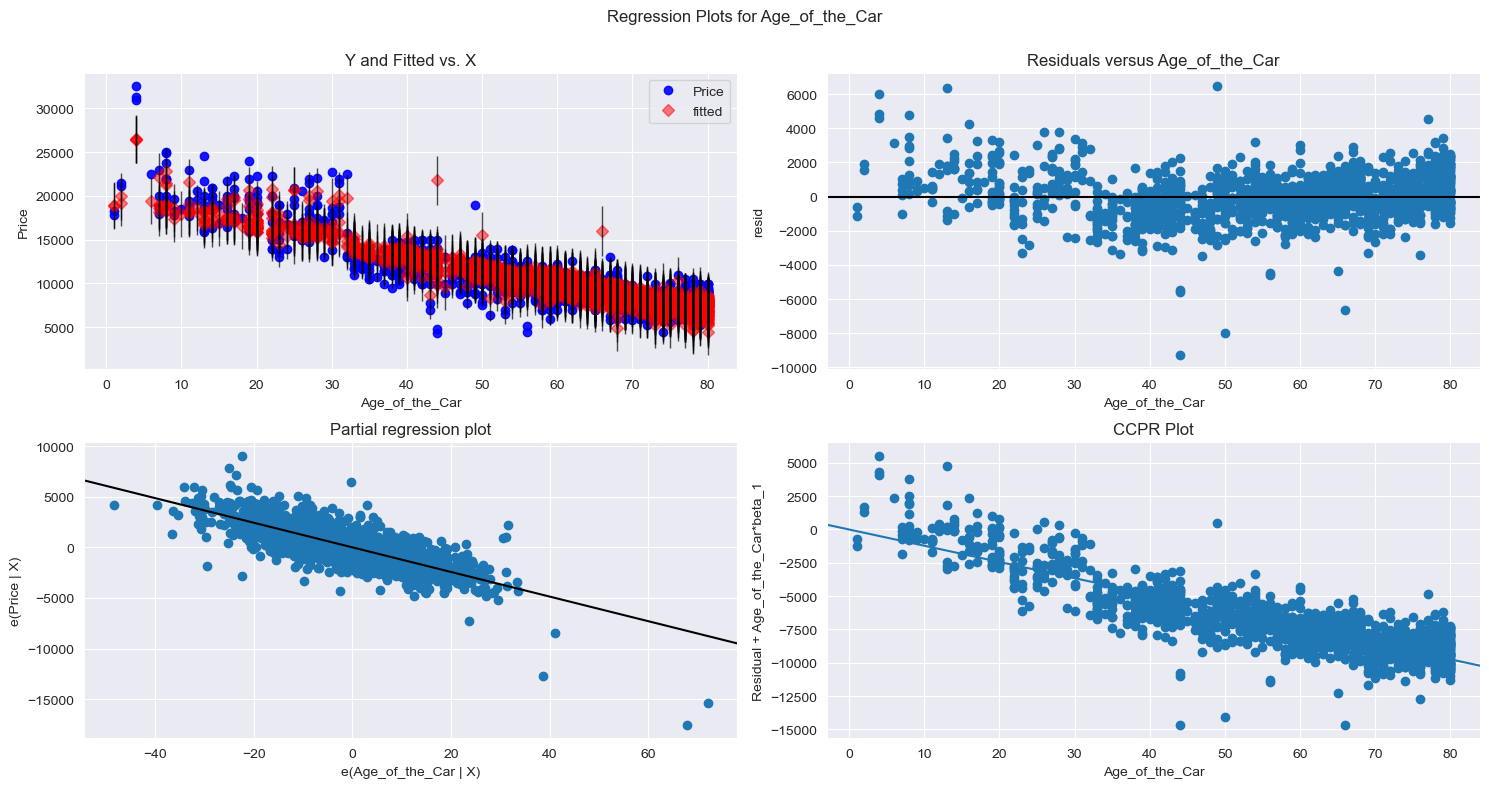

In [182]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig) 
# exog = x-variable & endog = y-variable

fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age_of_the_Car',fig=fig)
plt.show()

eval_env: 1


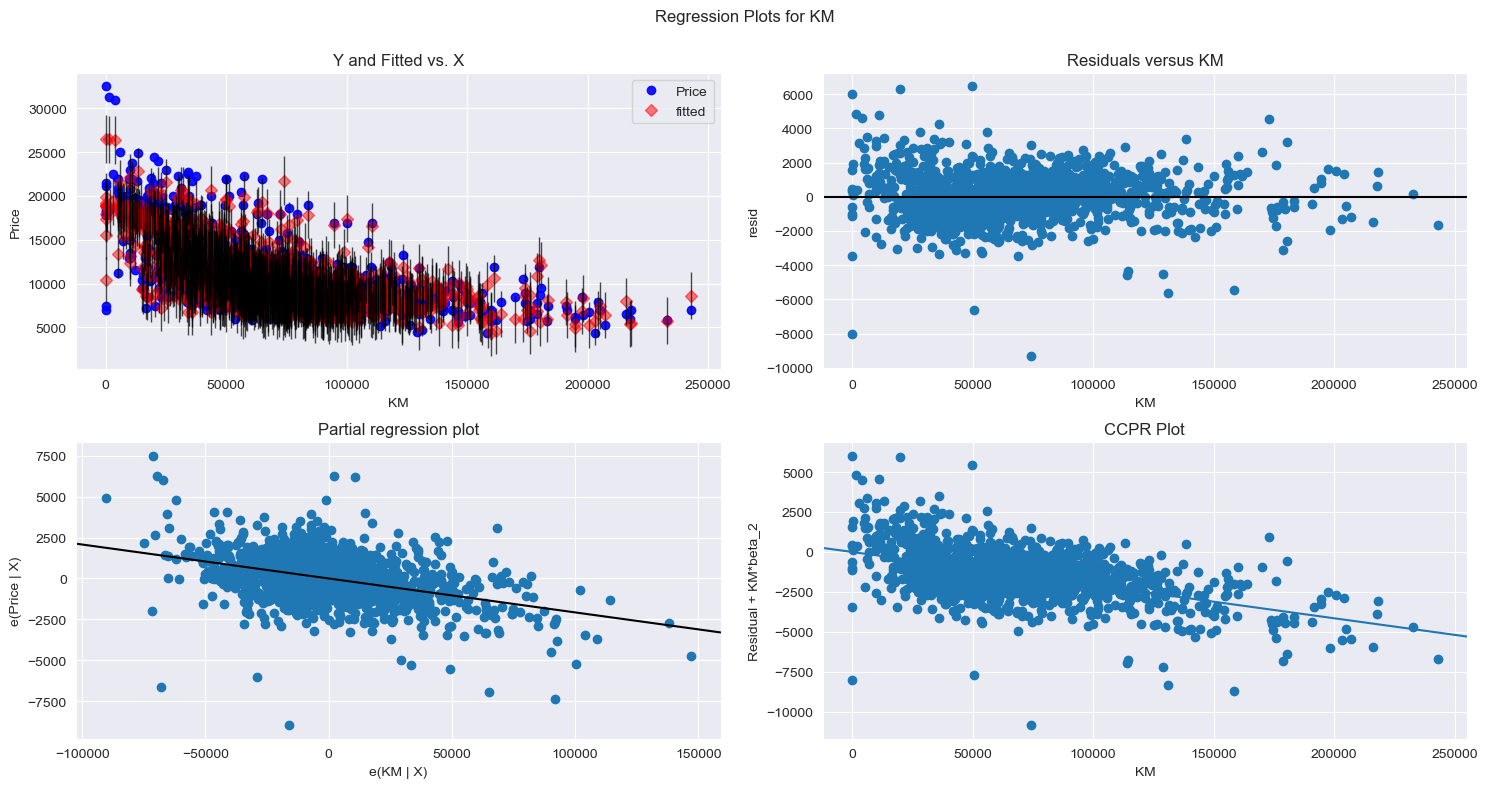

In [183]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


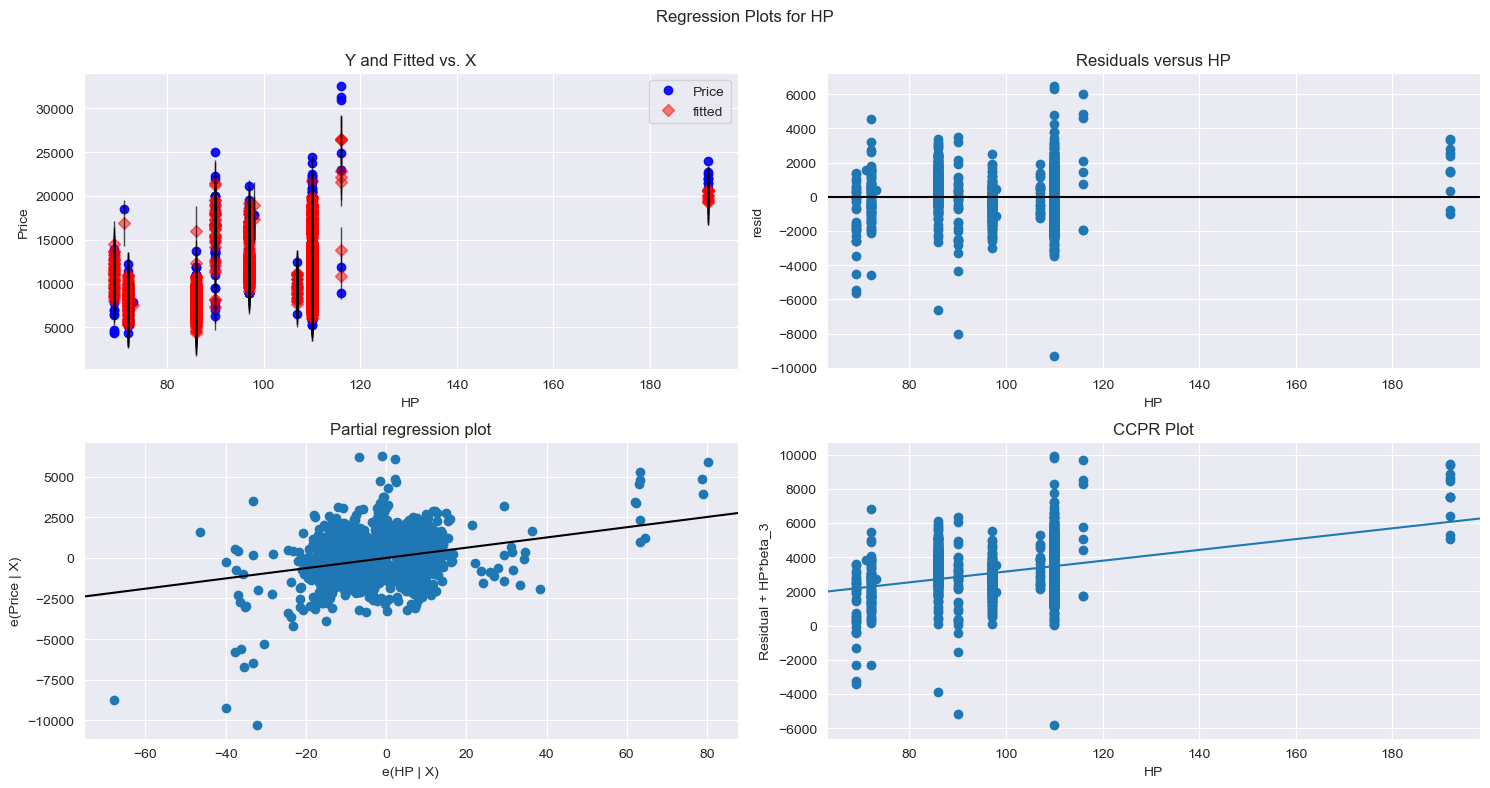

In [184]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


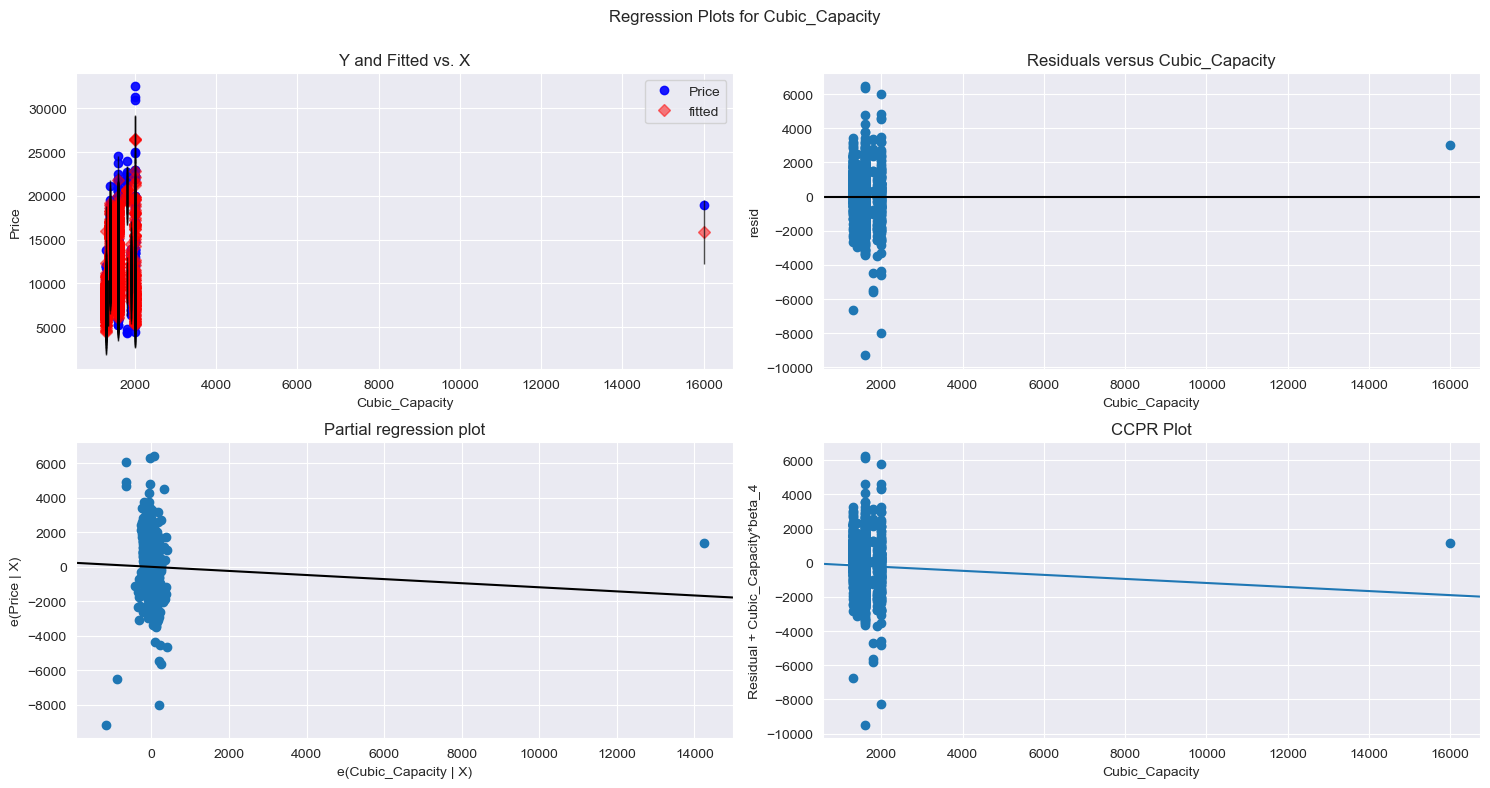

In [185]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Cubic_Capacity',fig=fig)
plt.show()

eval_env: 1


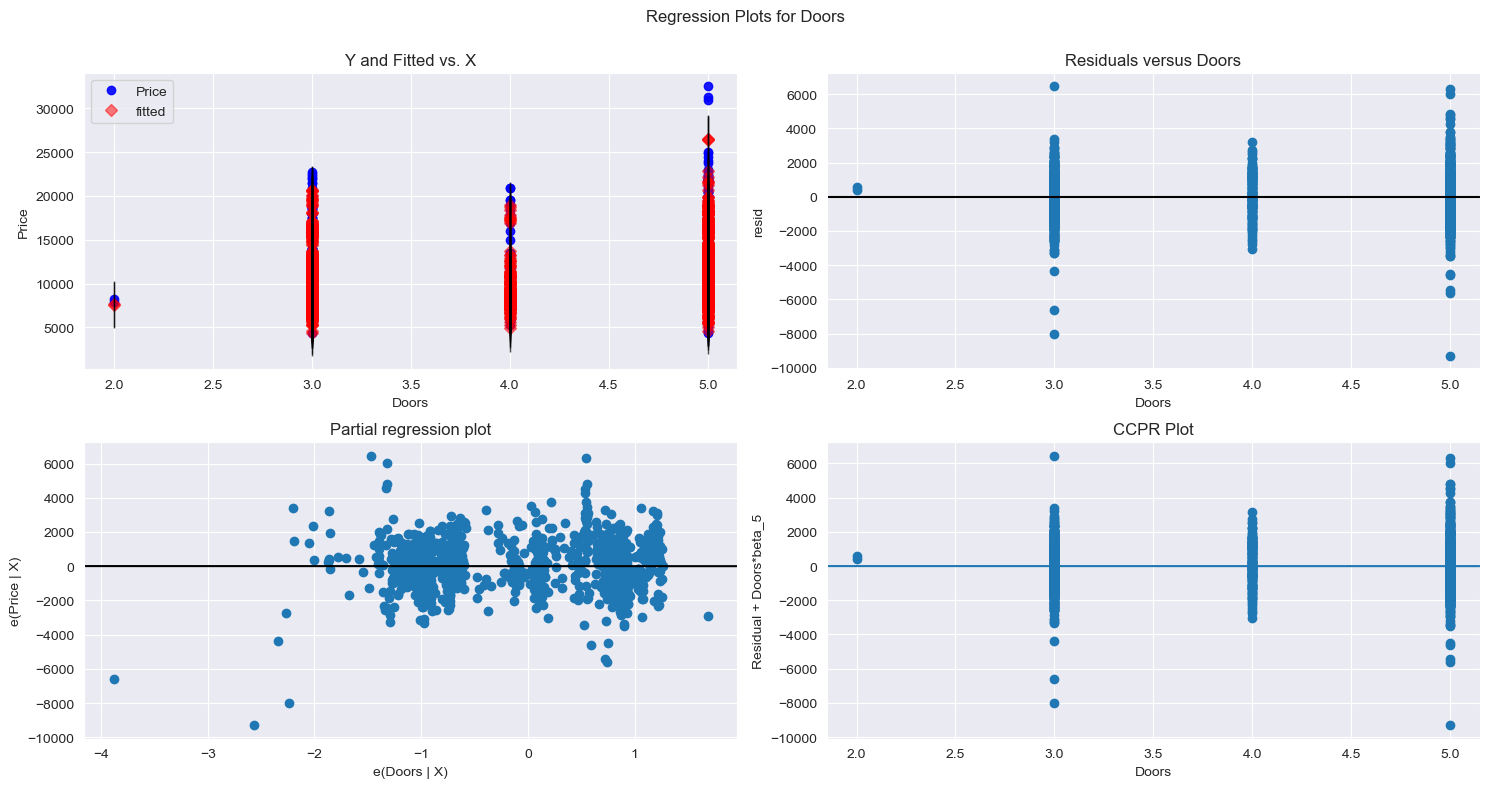

In [186]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


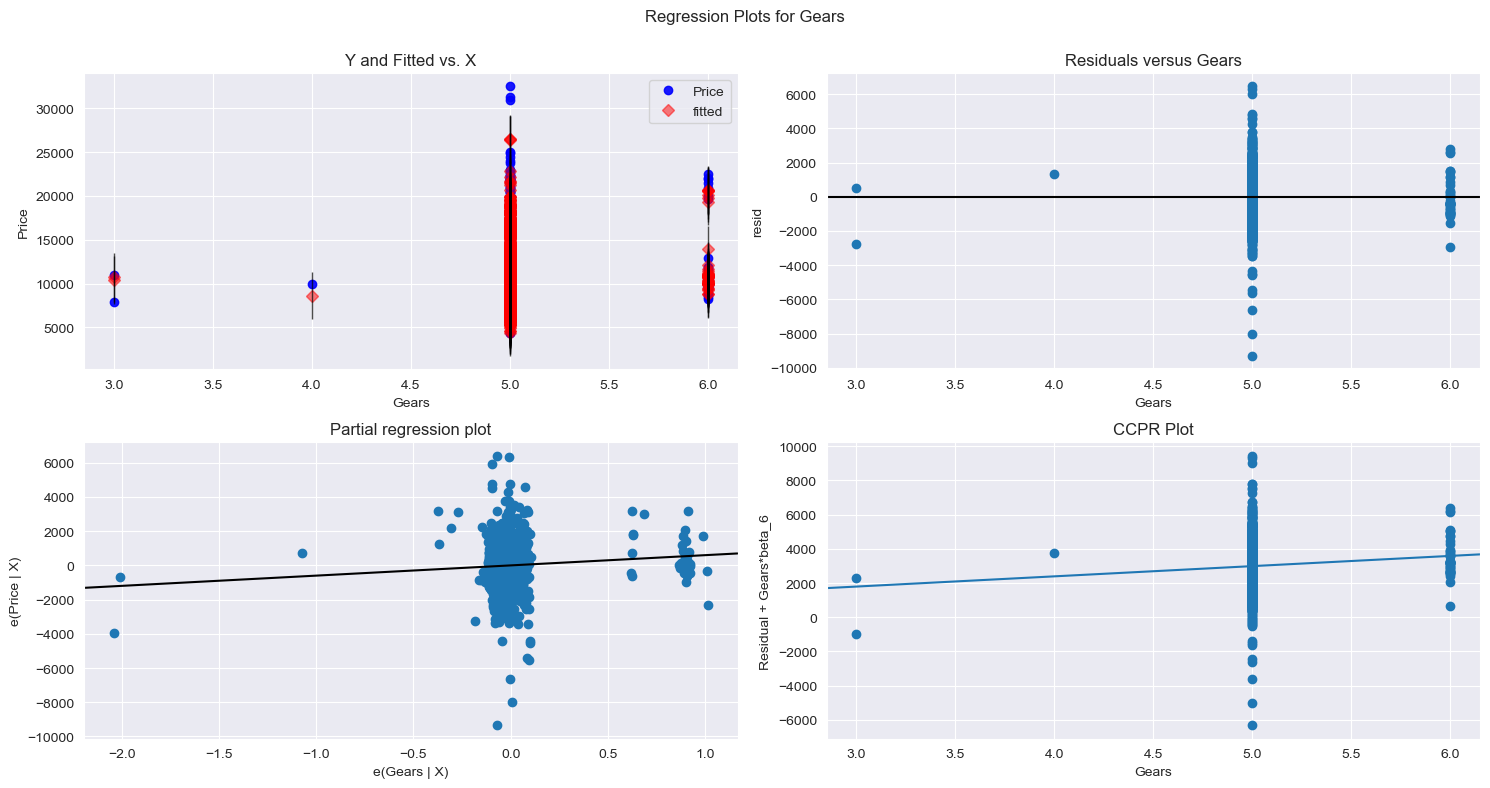

In [187]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


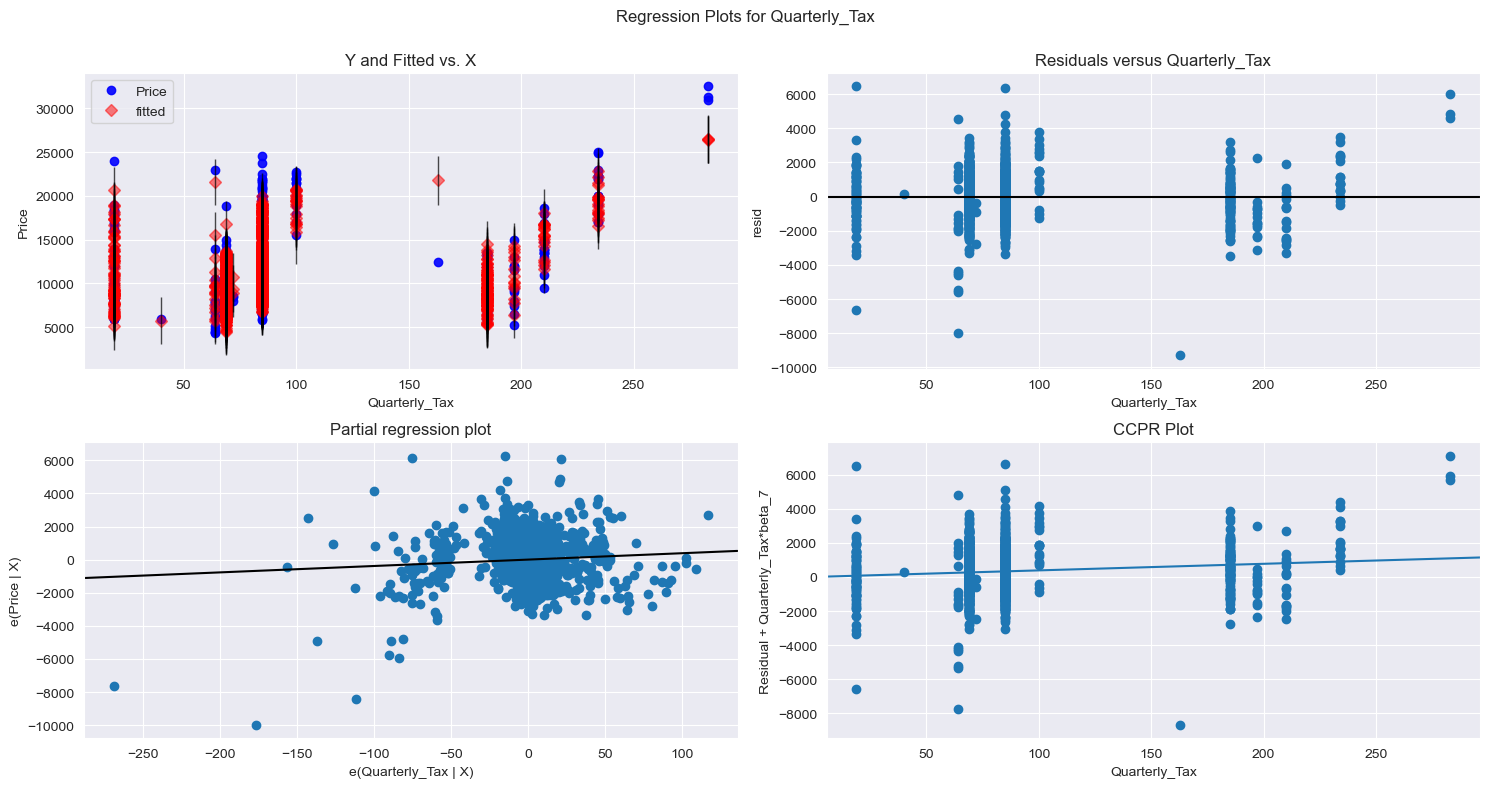

In [188]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)
plt.show()

eval_env: 1


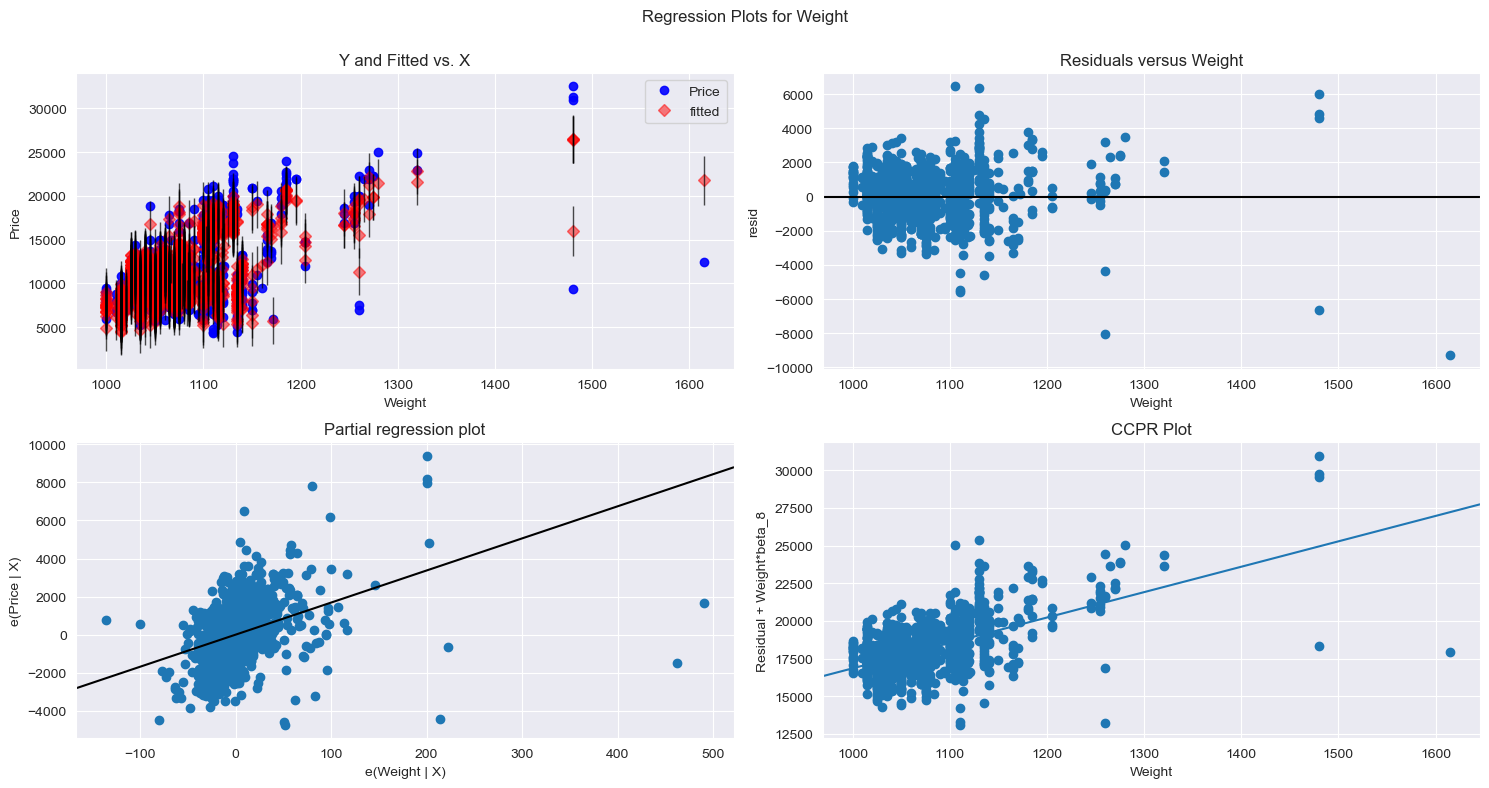

In [189]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

#### Model Deletion Diagnostics (checking Outliers or Influencers)


In [190]:
#Using Cook's Distance to perform the diagnostic
#Cook's Distance: If Cook's distance > 1, then it's an outlier
#Get influencers using cook's distance
#Cook's Distance is represented by the variable c
c,_=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

Cook's distance measures the influence of each observation on the estimated coefficients of a regression model.

The model.get_influence().cooks_distance command likely returns two arrays: the first array contains the Cook's distances for each observation in the dataset, and the second array contains the p-values associated with each Cook's distance value.

To identify influential observations using Cook's distance, you can compare each Cook's distance value to a threshold value of 1. If a Cook's distance value is greater than 1, it indicates that the corresponding observation may be an outlier or influential point.

So, in this case, you can examine the first array returned by the model.get_influence().cooks_distance command to identify any observations with Cook's distance values greater than 1.

To observe the same , we will plot a stem plot to identify the influencer or the outlier.

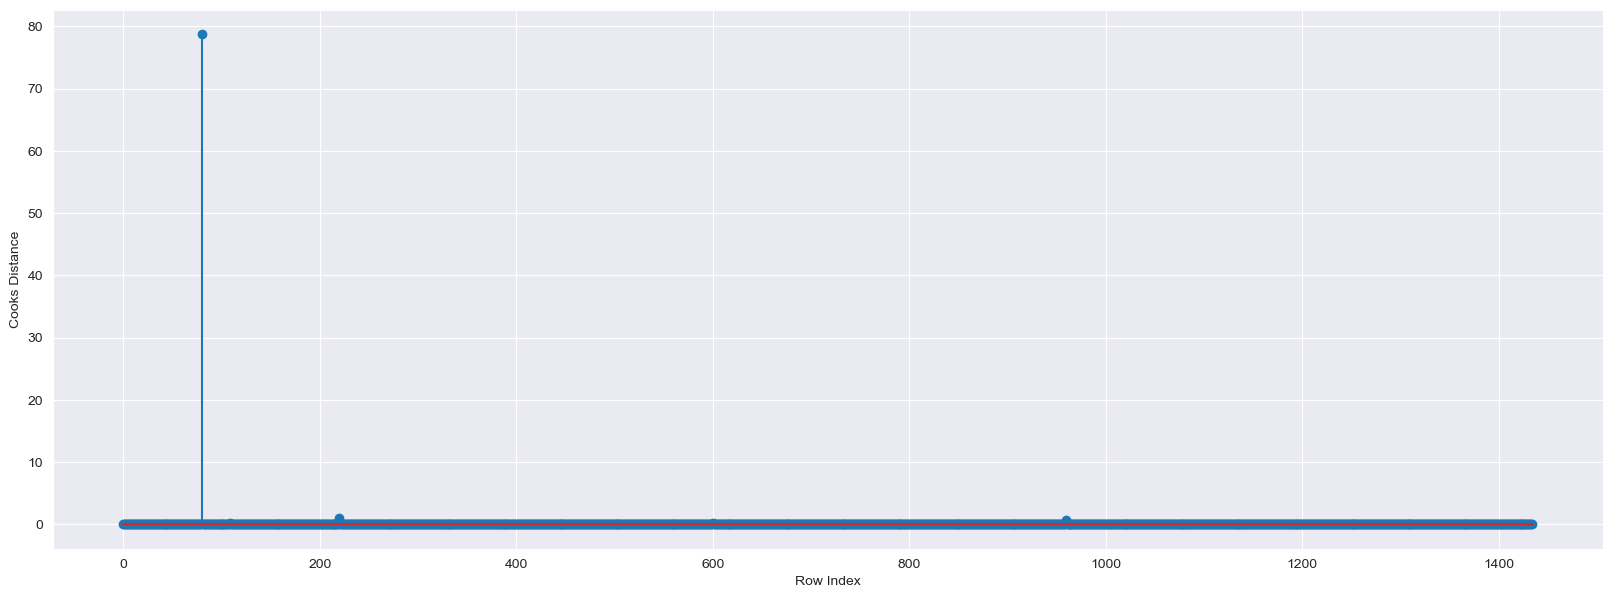

In [191]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

This code is creating a stem plot using the Matplotlib library in Python. The stem plot is used to visualize the Cook's distance of the dataset. Cook's distance is a statistical measure used to identify influential data points in regression analysis.

The stem plot is created using the stem() function from the Matplotlib library. The first argument of the stem() function is an array of indices, which are used to identify the rows of the dataset. The second argument is an array of Cook's distance values, which are rounded to three decimal places using the round() function from NumPy library.

The stem plot is then displayed using the show() function from Matplotlib library.

Overall, this code is useful for identifying the influential data points in a regression analysis using the Cook's distance measure.

In [192]:
#Index and value of influencer or the outlier
np.argmax(c) , np.max(c)

(80, 78.72950582250282)

The code you provided only returns the index and maximum value of the entire array c.
The function np.argmax() returns the index of the maximum value in the array, while np.max() returns the maximum value itself. 

Therefore, the code np.argmax(c), np.max(c) returns a tuple with two values:

The index of the maximum value in array c, which is 80.
The maximum value in array c, which is 78.72950582250282.

In [193]:
#To find the index and value of the first influencer where C > 0.5, you can use boolean indexing as follows:
index = np.where(c > 1)[0][0]
value = c[index]
value

78.72950582250282

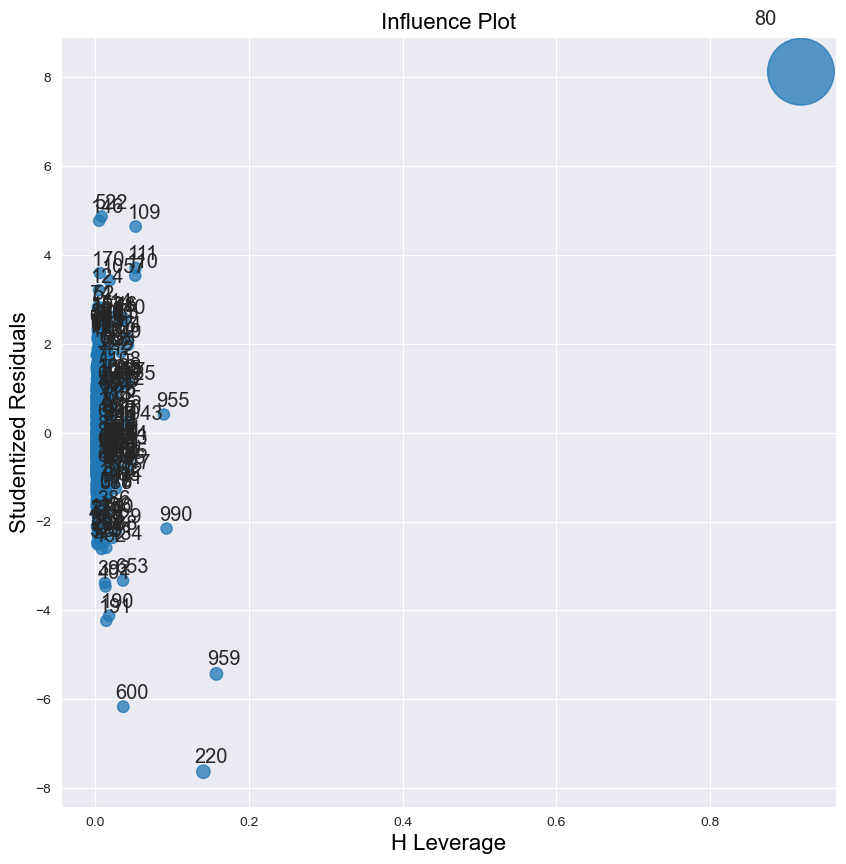

In [194]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(10,10))
fig=influence_plot(model,ax = ax)

We have created a plot using the influence_plot function of a model object.

However, in general, an influence plot is a visual tool used to identify influential data points in a regression model. In a linear regression, these points have a high leverage, meaning they have a large impact on the estimated coefficients of the model. Additionally, influential points have a high residual, meaning they have a large influence on the predicted response variable.

The influence_plot function typically generates a plot with the standardized residuals on the y-axis and the leverage values on the x-axis. Points that fall outside of a certain cutoff value for leverage (usually 2 * (p+1)/n, where p is the number of predictors and n is the sample size) are considered high leverage points. Points that fall outside of a certain cutoff value for standardized residuals (usually +/- 2 or 3) are considered influential points.

We can clearly observe that the the leverage value of 80 is a highly influential point or an outlier as we say.

In [195]:
#Leverage Cut off Value = 2*(p+1)/n ; p = no.of features/columns & n = no. of datapoints
p=cars.shape[1]
n=cars.shape[0]
leverage_cutoff = 2*(p+1)/n
leverage_cutoff

0.013937282229965157

This value represents a threshold for identifying influential data points in a regression analysis. Data points with leverage values greater than the leverage cutoff value may have a large impact on the regression model and should be further investigated.

This value can be compared with the leverage value of 80 which is approximately close to 0.88. The leverage value of 80 is significantly higher than the leverage cut off value. Hence, we drop the 80th row.

#### Improving the Model 

In [196]:
#Fetching the details of the 80th row
cars.iloc[80]

Price             18950
Age_of_the_Car       25
KM                20019
HP                  110
Cubic_Capacity    16000
Doors                 5
Gears                 5
Quarterly_Tax       100
Weight             1180
Name: 80, dtype: int64

In [197]:
# Creating a copy of data so that original dataset is not affected
cars_new=cars.copy()
cars_new

,Price,Age_of_the_Car,KM,HP,Cubic_Capacity,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


#### Model Deletion Diagnostics and Final Model

In [198]:
while np.max(c)>1 :
    model = smf.ols('Price~Age_of_the_Car+KM+HP+Cubic_Capacity+Doors+Gears+Quarterly_Tax+Weight',data=cars_new).fit()
    (c,_) = model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    #Drop the rows where the highly influential data point lies
    cars_new = cars_new.drop(cars_new.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    cars_new
else:
    final_model = smf.ols('Price~Age_of_the_Car +KM+HP+Cubic_Capacity+Doors+Gears+Quarterly_Tax+Weight',data=cars_new).fit()
    final_model.rsquared
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [199]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1413.
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:31:15   Log-Likelihood:                -12182.
No. Observations:                1431   AIC:                         2.438e+04
Df Residuals:                    1422   BIC:                         2.443e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.613e+04   1423.155    -11.333      0.000   -1.89e+04   -1.33e+04
Age_of_the_Car  -110.3700      2.445    -45.135      0.000    -115.167    -105.573
KM                -0.0177      0.001    -14.951      0.000      -0.020      -0.015
HP                34.2632      2.714     12.625      0.000      28.940      39.587
Cubic_Capacity    -3.6790      0.297    -12.372      0.000      -4.262      -3.096
Doors           -143.5437     36.919     -3.888      0.000    -215.965     -71.122
Gears            469.5788    177.682      2.643      0.008     121.033     818.125
Quarterly_Tax      3.6472      1.363      2.676      0.008       0.973       6.321
Weight            32.1321      1.289     24.931      0.000      29.604      34.660
==============================================================================
Omnibus:                       75.132   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.049
Skew:                           0.122   Prob(JB):                     6.82e-56
Kurtosis:                       5.050   Cond. No.                     3.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As, we can observe from the above model. We see a small change in the value of R-square as it jumped from 0.86 to 0.88. The value of AIC and BIC have slightly decreased as well which is considered to be a good for the model predictions.

#### Model Predictions for the final model

In [206]:
#New data for prediction is
new_data=pd.DataFrame({'Age_of_the_Car':5,"KM":2380,"HP":75,"Cubic_Capacity":890,"Doors":4,"Gears":6,"Quarterly_Tax":100,"Weight":1900},index=[0])
new_data

,Age_of_the_Car,KM,HP,Cubic_Capacity,Doors,Gears,Quarterly_Tax,Weight
0,5,2380,75,890,4,6,100,1900


In [207]:
#Manual Prediction of Price
final_model.predict(new_data)

0    46232.201269
dtype: float64

From the above prediction, we get to know about the price of the car i.e 46,232.201269.

In [211]:
#Automatic Prediction of Price 
prices_new=final_model.predict(cars_new)
prices_new

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64

The "final_model" is used to predict prices for a set of new cars. The set of new cars is likely stored in a variable called "cars_new".

The "predict" method of the final_model is then used to make predictions for the new cars. The resulting predicted prices are stored in a variable called "prices_new".